In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact

## Required functions

In [4]:
# NN-related
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adadelta

# Data set
from keras.datasets import mnist

# 1-hot encoding
from keras.utils import np_utils

## Data preprocessing

### Load MNIST dataset

In [5]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

### Reshape the data

In [6]:
x_train = x_train0.reshape(60000, -1)
x_test = x_test0.reshape(10000, -1)

### Standardization

In [7]:
x_train -= x_train.min()
x_train = x_train/x_train.max()
x_test -= x_test.min()
x_test = x_test/x_test.max()

Check whether `x_train` and `x_test` are centering and whitening.

In [8]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [9]:
x_test.min(), x_test.max()

(0.0, 1.0)

### 1-hot encoding

In [10]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

Take a look at `y_train` and `y_test` after conducting 1-hot encoding.

In [11]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
y_test[79]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Building NN

The structure of our artificial neural networks.  

![](image/NN_API.PNG)

The definition of the variables.  
* $x$: the dimension of the input image, which is 784.
* $h_1$: the result after computing by the hidden layer $f_1$, $h_1=f_1(x)$. Dim($h_1$)=200.
* $h_2$: the result after computing by the hidden layer $f_2$, $h_2=f_2(h1)$. Dim($h_2$)=50.
* $h_3$: the result after computing by the hidden layer $f_3$, $h_3=f_3(h1)$. Dim($h_3$)=50.
* $h_4$: the result after computing by the hidden layer $f_4$, $h_4=f_4(h2)$. Dim($h_3$)=20.
* $h_5$: the result after computing by the hidden layer $f_5$, $h_5=f_5(h3)$. Dim($h_3$)=20.
* $y$: the result after computing by the hidden layer $f_6$, $y=f_6(h_4,h_5)$, which represents the probabilities that x may be. Dim($y$)=10.

In [13]:
# Functional API
from keras.models import Model
from keras.layers import Input

### Define the hidden layers

In [14]:
f1 = Dense(200, activation='selu')    # 784 to 100  
f2 = Dense(50, activation='relu')     # 100 to 50
f3 = Dense(50, activation='relu')     # 100 to 50
f4 = Dense(20, activation='linear')   #  50 to 20
f5 = Dense(20, activation='linear')   #  50 to 20
f6 = Dense(10, activation='softmax')  #  40 to 10

### Define the variables

In [15]:
x = Input(shape = (784,))
h1 = f1(x)
h2 = f2(h1)
h3 = f3(h1)
h4 = f4(h2)
h5 = f5(h3)

In [16]:
from keras.layers import concatenate

In [17]:
u = concatenate([h4,h5]) 
y = f6(u)

### Take a look at the NN

In [18]:
model = Model(x, y)
model.summary() 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 50)           10050       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 50)           10050       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [19]:
model.compile(loss='mse', optimizer=Adadelta(lr=1), metrics=['accuracy'])

### Evaluate the NN

In [20]:
score = model.evaluate(x_train, y_train, batch_size=10000)
print("Loss: %f" %score[0])
print("Accuaracy: %f" %score[1])

60000/60000 [==============================] - 3s 43us/step
Loss: 0.092386
Accuaracy: 0.117800


## Training NN

In [21]:
model_fitted = model.fit(x_train, y_train, batch_size=100, verbose = 1, epochs=20) 

Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0189 - acc: 0.8762
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0095 - acc: 0.9392
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0075 - acc: 0.9526
Epoch 4/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0062 - acc: 0.9607
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0054 - acc: 0.9663
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0047 - acc: 0.9711
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0042 - acc: 0.9747
Epoch 8/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0038 - acc: 0.9774
Epoch 9/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0035 - acc: 0.9791
Epoch 10/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0032 - acc: 0.9813

### Training accuracy for each apoch

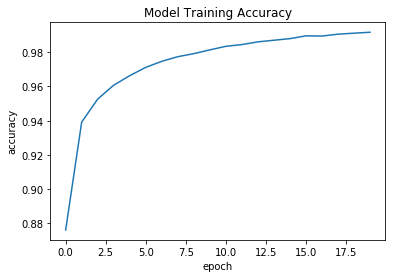

In [22]:
plt.plot(model_fitted.history["acc"])
plt.title("Model Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

[nbviewer](https://nbviewer.jupyter.org/github/roam041/My-Python-Lab/blob/master/Q8-1.ipynb)

In [23]:
score = model.evaluate(x_test, y_test)
print('Loss', round(score[0],4))
print('Accuracy', score[1])

10000/10000 [==============================] - 1s 77us/step
Loss 0.0037
Accuracy 0.9762
